<a href="https://colab.research.google.com/github/mkbahk/AmazonBraket/blob/main/IBMCloud_Runtime_Estimator_Primitives_SingleExperiment_Qiskit_1_2_4_mkbahk_20241022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Install Qiskit

In [ ]:
!pip install qiskit[visualization]==1.2.4
!pip install qiskit-ibm-runtime==0.31.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 4.4 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=0a56c5cc1942bd7b39e58feada5858b620b36461b4640f960f2384a91bd97ba1
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

##Quantum Workflow
00_start_qiskit_patterns_diagram.svg

##Step 1. Set up an Quantum Runtime Service channel

In [ ]:
#from qiskit_ibm_runtime import QiskitRuntimeService
#service = QiskitRuntimeService(channel="ibm_cloud", token="API-Kere is here", instance="crn is here")

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Save an IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(
    channel="ibm_cloud",
    token="O8SRT0WF6wehHJCopVm8kYrk711jS1YiYP0TTHLllrVt",
    instance="crn:v1:bluemix:public:quantum-computing:us-east:a/71306d10032b425fb301ccb4c4df2a2c:14b2586f-b4a8-4319-b364-c359a2ba239a::",
    # Explicitly set instance to None for ibm_cloud channel
    set_as_default=True,
    # Use `overwrite=True` if you're updating your token.
    overwrite=True,
)

# Load saved credentials
service = QiskitRuntimeService()

In [ ]:
print(service.backends())

[<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_fez')>, <IBMBackend('ibm_kyiv')>, <IBMBackend('ibm_sherbrooke')>, <IBMBackend('ibm_torino')>, <IBMBackend('ibmq_qasm_simulator')>, <IBMBackend('simulator_stabilizer')>, <IBMBackend('simulator_mps')>, <IBMBackend('simulator_extended_stabilizer')>, <IBMBackend('simulator_statevector')>]


In [ ]:
#backend = service.backends()[0]
backend = service.least_busy(operational=True, simulator=False)
#backend = service.backend("ibm_brisbane")
#backend = service.backend("ibmq_qasm_simulator")
#backend = service.backend("simulator_statevector")
#backend = service.backend("simulator_mps")
#backend = service.backend("simulator_stabilizer")

In [ ]:
print(backend)

<IBMBackend('ibm_brisbane')>


#Run a single experiment

In [ ]:
import numpy as np
from qiskit.circuit.library import IQP
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.quantum_info import SparsePauliOp, random_hermitian
from qiskit_ibm_runtime import QiskitRuntimeService, EstimatorV2 as Estimator


#n_qubits = 127


n_qubits = 50

#service = QiskitRuntimeService()
#backend = service.least_busy(operational=True, simulator=False, min_num_qubits=n_qubits)

mat = np.real(random_hermitian(n_qubits, seed=1234))
circuit = IQP(mat)
observable = SparsePauliOp("Z" * n_qubits)

#n_qubits = 127일때 ibm_brisbane에서 아래와 같은 에러 발생

10/21/2024 22:41:47.889 - user_logger - ERROR Error executing program job csbdd4p3olk6fc8cjqg0: '53859 2-qubit gates exceeds the system limits by 438.590% in combination with the option configuration. -- Split circuits or PUBs into multiple jobs. See `Run jobs in a batch <https://docs.quantum.ibm.com/guides/run-jobs-batch#partition>`__ for an example. -- https://ibm.biz/error_codes#1520':
<br>
<br>
10/21/2024 22:41:47.916 - user_logger - ERROR Failed to execute program: '53859 2-qubit gates exceeds the system limits by 438.590% in combination with the option configuration. -- Split circuits or PUBs into multiple jobs. See `Run jobs in a batch <https://docs.quantum.ibm.com/guides/run-jobs-batch#partition>`__ for an example. -- https://ibm.biz/error_codes#1520'


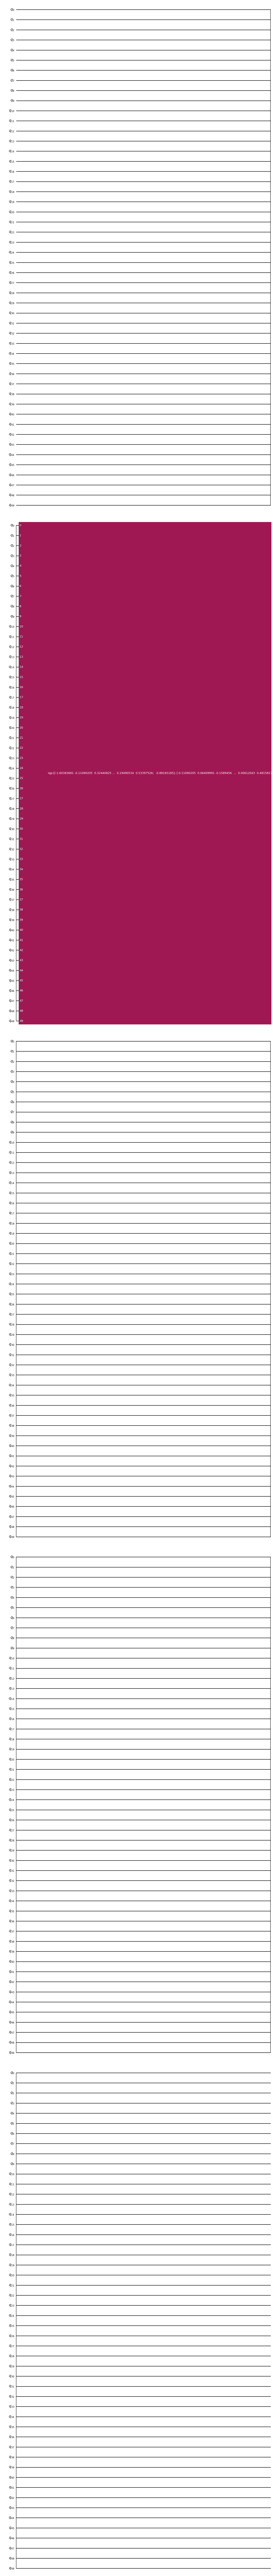

In [ ]:
circuit.draw(output="mpl")

In [ ]:
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(circuit)
isa_observable = observable.apply_layout(isa_circuit.layout)

KeyboardInterrupt: 

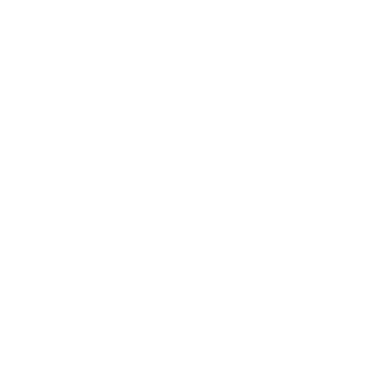

In [ ]:
isa_circuit.draw(output="mpl")

In [ ]:
estimator = Estimator(backend)
job = estimator.run([(isa_circuit, isa_observable)])

# Use the job ID to retrieve your job data later
print(f">>> Job ID: {job.job_id()}")

In [ ]:
print(job.status())

QUEUED


In [ ]:
result = job.result()

print(f" > Expectation value: {result[0].data.evs}")
print(f" > Metadata: {result[0].metadata}")